In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

def integral(Y1,Y2,E1,E2):
    INT=(Y2*E2-Y1*E1)/((np.log(Y2/Y1)/np.log(E2/E1)+1))
    #print(E1,E2,INT)
    return INT

def load_obj(name):
    with open('C:\\Users\\ginti\\Desktop\\nirs\\' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def Y_NM_Mi20_a(energy,h):
    P=np.sqrt(energy*energy+2*0.938*energy)
    X=np.log(P)
    if energy<1.7:
        a,b,c,d=0.5082, -3.0659, 7.2827, -9.5396
    #if energy<1.6:
    #    a,b,c,d=2.0404,	-8.1776,	12.354,	-11.1
    elif (energy>=1.7 and energy<15):
        a,b,c,d=0.1179,	-1.2022,	4.9329,	-8.65
    else:
        a,b,c,d=0,	-0.0365,	1.206,	-4.763
    LnY1000=a*X*X*X+b*X*X+c*X+d
    Y1000=np.exp(LnY1000)
    A = 9.422E-09*np.power(X,5) - 2.284E-07*np.power(X,4) + 2.037E-06*np.power(X,3) - 7.828E-06*np.power(X,2) + 1.203E-05*np.power(X,1) - 5.545E-06					
    B = -5.351E-06*np.power(X,5) + 1.316E-04*np.power(X,4) - 1.226E-03*np.power(X,3) + 5.176E-03*np.power(X,2) - 1.017E-02*np.power(X,1) + 1.458E-02				
    alt_dep=(1000-h)*(1000-h)*A+(1000-h)*B
    Y=Y1000*np.exp(alt_dep)
    return Y

def Y_NM_Mi20_p(energy, h):
    P=np.sqrt(energy*energy+2*0.938*energy)
    X=np.log(P)
    #if energy<1.25:
    #    a,b,c,d=6.09,	-14.06,	13.98,	-11.615
    if energy<1.28:
        a,b,c,d=0,	-8.6616,	13.879,	-12.104
    elif energy >=1.28 and energy<10:
        a,b,c,d=-0.186,	0.428,	2.831,	-8.76
    else:
        a,b,c,d=0,	-0.0365,	1.206,	-4.763
    LnY1000=a*X*X*X+b*X*X+c*X+d
    Y1000=np.exp(LnY1000)
    A= 6.945E-09*np.power(X,5) - 1.461E-07*np.power(X,4) + 1.115E-06*np.power(X,3) - 3.402E-06*np.power(X,2) + 3.355E-06*np.power(X,1) - 9.823E-07
    B= -3.963E-06*np.power(X,5) + 8.091E-05*np.power(X,4) - 6.394E-04*np.power(X,3) + 2.348E-03*np.power(X,2) - 4.713E-03*np.power(X,1) + 1.186E-02
    alt_dep=(1000-h)*(1000-h)*A+(1000-h)*B
    Y=Y1000*np.exp(alt_dep)
    return Y

In [23]:
def summ1(pc,depth):
    
    data_protons = load_obj('AMS_spec_p')
    data_he = load_obj('AMS_spec_he')
    
    al = []
    s1 = 0
    
    for j in data_protons:
        for k in range(5,71):
            if float(data_protons[j].iloc[[k], [0]].values) > pc:            
                a = float(data_protons[j].iloc[[k], [4]].values)
                b = Y_NM_Mi20_p(a,700) * float(data_protons[2462].iloc[[k], [6]].values)
                c = float(data_protons[j].iloc[[k+1], [4]].values)
                d = Y_NM_Mi20_p(c,700) * float(data_protons[2462].iloc[[k+1], [6]].values)
        s1 += integral(b, d, a, c)
        al.append(s1)
        
    s2 = 0
    an = []
    
    iheavy = open('C:\\Users\\ginti\\Desktop\\nirs\\heavy.txt','r')
    linesiheavy = iheavy.readlines()
    heavy = []
    for x in linesiheavy:
        heavy.append(x.split()[1])
    iheavy.close()
    
    for j in data_he:
        for k in range(0,66):        
            if float(data_he[j].iloc[[k], [0]].values) > pc:
                a = float(data_he[j].iloc[[k], [4]].values)
                b = Y_NM_Mi20_a(a,700) * float(data_he[j].iloc[[k], [6]].values) * (1 + float(heavy[k]))
                c = float(data_he[j].iloc[[k+1], [4]].values)
                d = Y_NM_Mi20_a(c,700) * float(data_he[j].iloc[[k+1], [6]].values)  * (1 + float(heavy[k]))
                s2 += integral(b, d, a, c)
        an.append(4*s2)
        s2 = 0
    nn = []
    
    for i in range(0,66):
        if al[i] == 0 :
            phe = 0
        else:
            phe = an[i] / (al[i] + an[i])
        nn.append(phe)
        
    return nn

def summ2(pc,depth):
    
    data_protons = load_obj('AMS_spec_p')
    data_he = load_obj('AMS_spec_he')
    
    al = []
    s1 = 0
    
    for j in data_protons:
        for k in range(5,71):
            if float(data_protons[j].iloc[[k], [0]].values) > pc:            
                a = float(data_protons[j].iloc[[k], [4]].values)
                b = Y_NM_Mi20_p(a,1000) * float(data_protons[2462].iloc[[k], [6]].values)
                c = float(data_protons[j].iloc[[k+1], [4]].values)
                d = Y_NM_Mi20_p(c,1000) * float(data_protons[2462].iloc[[k+1], [6]].values)
        s1 += integral(b, d, a, c)
        al.append(s1)
        
    s2 = 0
    an = []
    
    iheavy = open('C:\\Users\\ginti\\Desktop\\nirs\\heavy.txt','r')
    linesiheavy = iheavy.readlines()
    heavy = []
    for x in linesiheavy:
        heavy.append(x.split()[1])
    iheavy.close()
    
    for j in data_he:
        for k in range(0,66):        
            if float(data_he[j].iloc[[k], [0]].values) > pc:
                a = float(data_he[j].iloc[[k], [4]].values)
                b = Y_NM_Mi20_a(a,1000) * float(data_he[j].iloc[[k], [6]].values) * (1 + float(heavy[k]))
                c = float(data_he[j].iloc[[k+1], [4]].values)
                d = Y_NM_Mi20_a(c,1000) * float(data_he[j].iloc[[k+1], [6]].values)  * (1 + float(heavy[k]))
                s2 += integral(b, d, a, c)
        an.append(4*s2)
        s2 = 0
    nn = []
    
    for i in range(0,66):
        if al[i] == 0 :
            phe = 0
        else:
            phe = an[i] / (al[i] + an[i])
        nn.append(phe)
        
    return nn

In [24]:
nn07 = summ1(0,700)
nn57 = summ1(5,700)
nn107 = summ1(10,700)

In [32]:
nn010 = summ2(0,1000)
nn510 = summ2(5,1000)
nn1010 = summ2(10,1000)

In [33]:
time = load_obj('AMS_time')
t = []
for j in range(0, 66):
    a = float(time.iloc[[j], [0]].values)
    t.append(a)

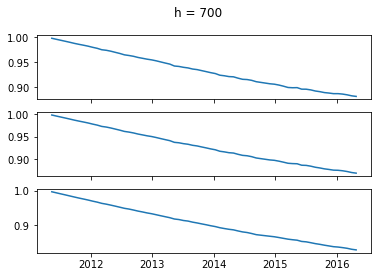

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle('h = 700')
ax1.plot(t, nn07)
ax2.plot(t, nn57)
ax3.plot(t, nn107)

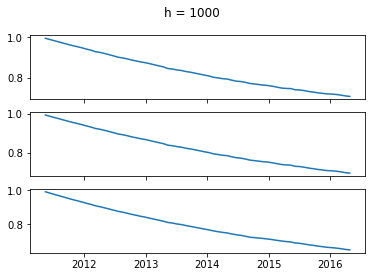

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle('h = 1000')
ax1.plot(t, nn010)
ax2.plot(t, nn510)
ax3.plot(t, nn1010)

Text(0.5, 0.98, 'rc = 10, h = 700')

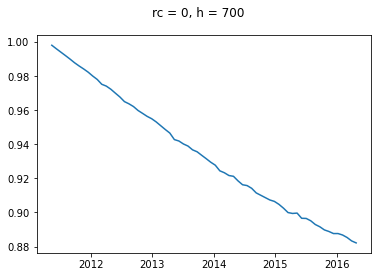

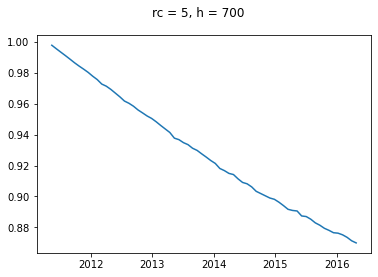

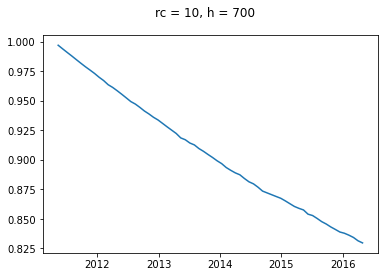

In [47]:
fig,ax1=plt.subplots()
ax1.plot(t,nn07)
fig.suptitle('rc = 0, h = 700')
fig,ax1=plt.subplots()
ax1.plot(t,nn57)
fig.suptitle('rc = 5, h = 700')
fig,ax1=plt.subplots()
ax1.plot(t,nn107)
fig.suptitle('rc = 10, h = 700')

Text(0.5, 0.98, 'rc = 10, h = 1000')

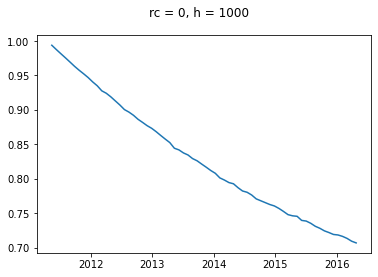

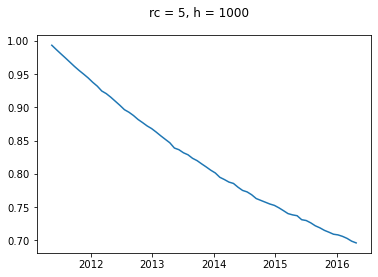

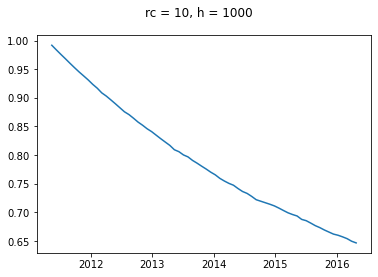

In [48]:
fig,ax1=plt.subplots()
ax1.plot(t,nn010)
fig.suptitle('rc = 0, h = 1000')
fig,ax1=plt.subplots()
ax1.plot(t,nn510)
fig.suptitle('rc = 5, h = 1000')
fig,ax1=plt.subplots()
ax1.plot(t,nn1010)
fig.suptitle('rc = 10, h = 1000')